In [184]:
from typing import List, Callable, Any # para docstrings y typing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Laboratorio de regresión regularizada | Geordie Quiroa

In [270]:
df = pd.read_csv('./Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [271]:
df.sample(10, random_state=161)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
179,180,307,102,3,3.0,3.0,8.27,0,0.73
143,144,340,120,4,4.5,4.0,9.92,1,0.97
114,115,311,105,3,3.5,3.0,8.45,1,0.59
23,24,334,119,5,5.0,4.5,9.70,1,0.95
72,73,321,111,5,5.0,5.0,9.45,1,0.93
361,362,334,116,4,4.0,3.5,9.54,1,0.93
214,215,331,117,4,4.5,5.0,9.42,1,0.94
342,343,308,106,3,3.0,3.0,8.24,0,0.58
366,367,320,104,3,3.5,4.5,8.34,1,0.74
59,60,311,104,2,2.0,2.0,8.30,0,0.42


In [272]:
#!pip freeze >> requirements.txt
pd.set_option('display.max.columns', None) # indico que se muestren todas las columnas
pd.set_option('display.precision',2) # establezco 2 decimales de precisión.

In [273]:
df.describe() # descripicon estadistica de los datos

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,200.50,316.81,107.41,3.09,3.40,3.45,8.60,0.55,0.72
std,115.61,11.47,6.07,1.14,1.01,0.90,0.60,0.50,0.14
min,1.00,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,100.75,308.00,103.00,2.00,2.50,3.00,8.17,0.00,0.64
50%,200.50,317.00,107.00,3.00,3.50,3.50,8.61,1.00,0.73
75%,300.25,325.00,112.00,4.00,4.00,4.00,9.06,1.00,0.83
max,400.00,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


In [274]:
df.info() # conteo de valores no nulos por feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [275]:
df.drop('Serial No.', axis=1, inplace=True)

In [276]:
azul, gris = '#A8BABD', '#E1E1E1'

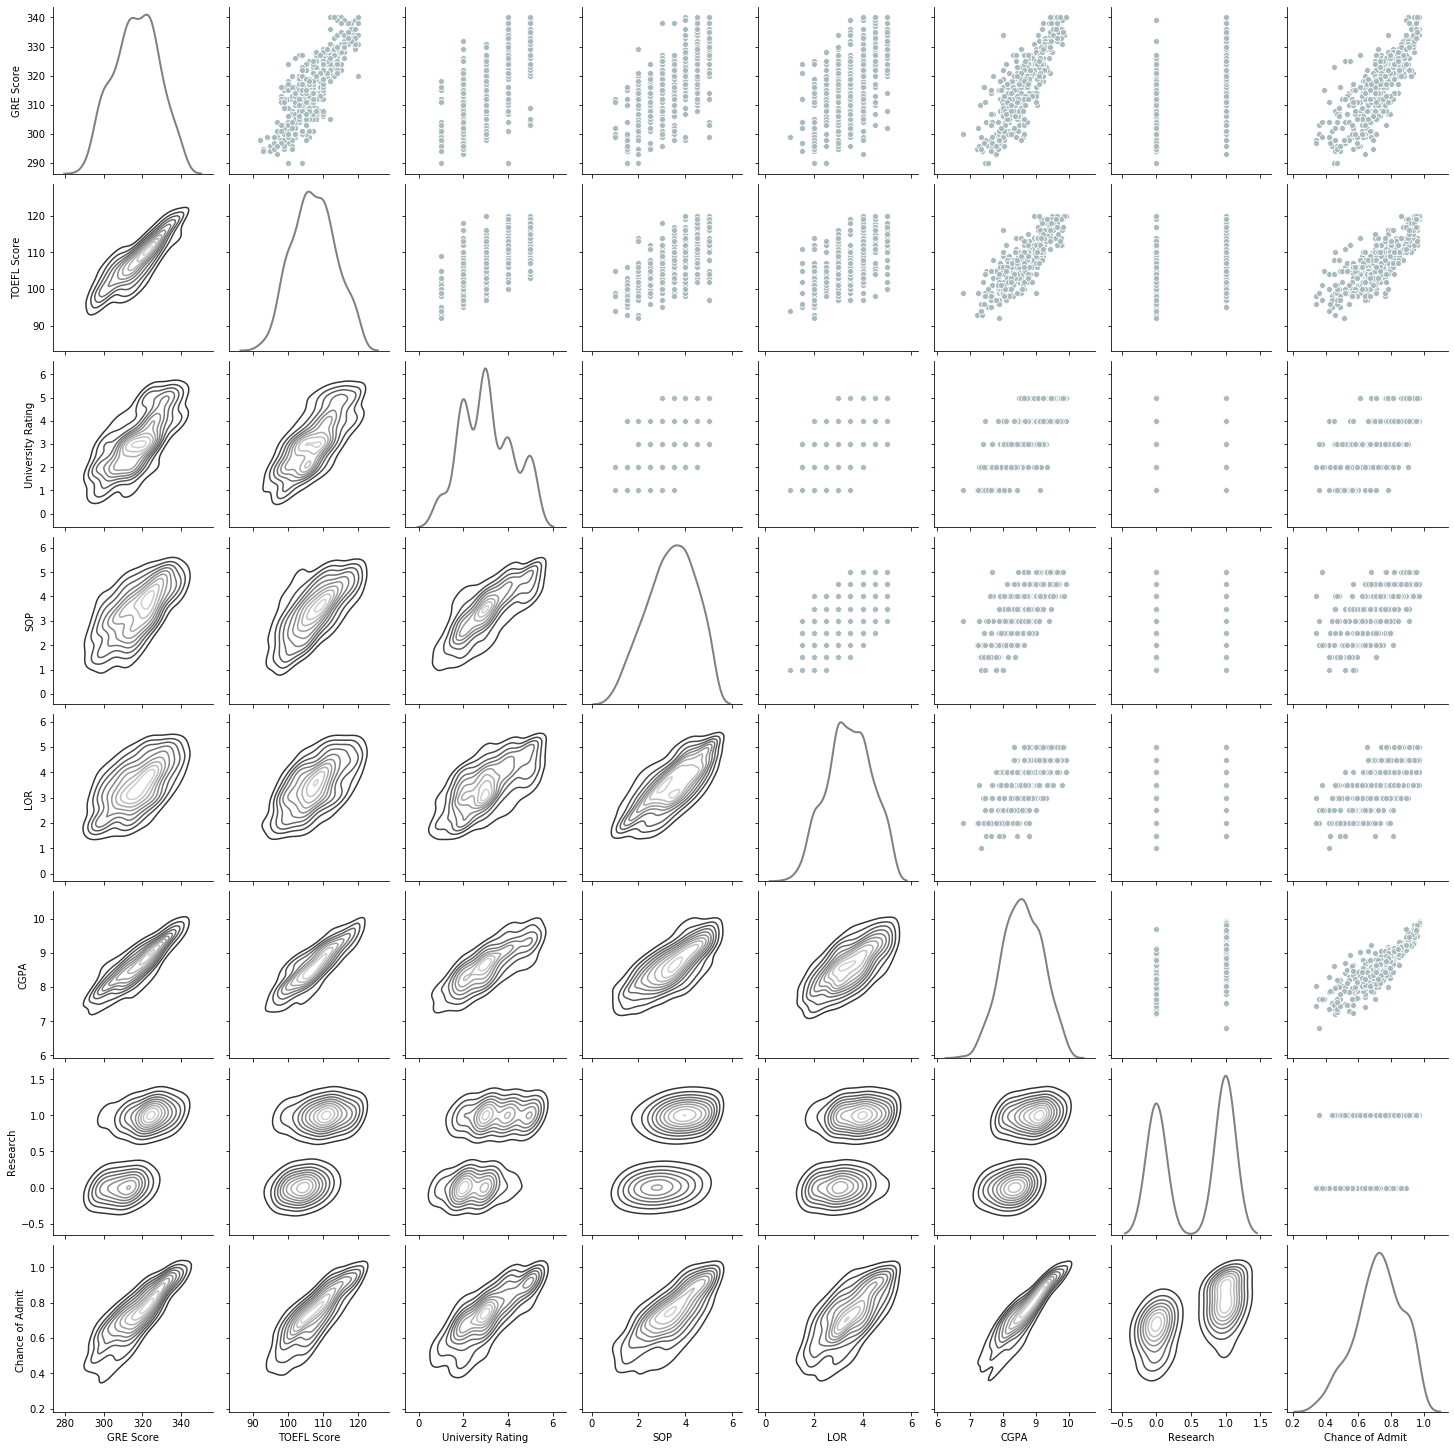

In [277]:
# análisis visual de las distribuciones, densidad de frecuencia y dispersión para cada variable numérica del dataset con el
# fin de determinar patrones, correlación, frecuencias entre otros insights entre variables
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, color=gris) # tipo de visualización para diagonal inferior
g.map_upper(sns.scatterplot, color=azul) # tipo de visualización para diagonal superior
g.map_diag(sns.kdeplot, lw=2,color='gray') # tipo de visualización para diagonal principal
plt.show()

Las variables con menor heteroskedasticidad visual respecto a Chance of Admit, es CGPA y TOEFL Score.

In [278]:
# GRE -> CGPA, TOEFL -> Chance of Admit

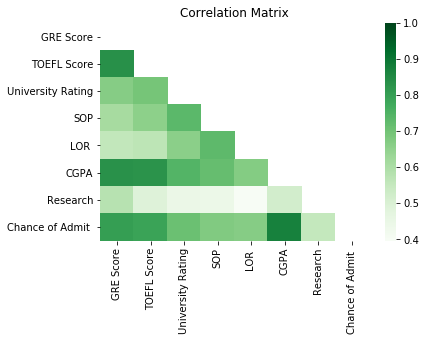

In [279]:
corr = df.corr() # matriz de correlacion para vars numericas del dataset.
mask = np.zeros_like(corr, dtype = np.bool) # creo la máscara para mostrar solo una mitad para no repetir la matriz.
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

In [280]:
_vars = list(df.columns)
_vars

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [281]:
vars_limpias = [
    'GRE_Score',
     'TOEFL_Score',
     'University_Rating',
     'SOP',
     'LOR',
     'CGPA',
     'Research',
    'Chance_of_Admit'
]

In [282]:
vars_limpias = dict(zip(_vars, vars_limpias))
vars_limpias

{'GRE Score': 'GRE_Score',
 'TOEFL Score': 'TOEFL_Score',
 'University Rating': 'University_Rating',
 'SOP': 'SOP',
 'LOR ': 'LOR',
 'CGPA': 'CGPA',
 'Research': 'Research',
 'Chance of Admit ': 'Chance_of_Admit'}

In [283]:
df.rename(columns=vars_limpias, inplace=True)

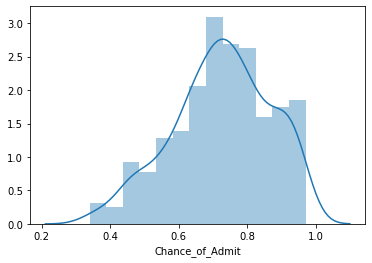

In [284]:
sns.distplot(df['Chance_of_Admit'])

In [285]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Creación de variable sintética
A continuación se creará la variable sintética: Probabilidad: Alta | Baja, utilizando la media de la población de los datos. Esta variable se agregará con el fin de llevar a cabo una clusterización para observar las variables que mejor definen cada cluster utilizando LDA y PCA.

In [286]:
vars_independientes = [
    'GRE_Score',
     'TOEFL_Score',
     'University_Rating',
     'SOP',
     'LOR',
     'CGPA',
     'Research'
]

var_dependiente = [
    'Chance_of_Admit'
]

In [287]:
media = df.Chance_of_Admit.mean()

def probabilidad(series, mu = media):
    
    if series['Chance_of_Admit'] < mu:
        return 0
    if series['Chance_of_Admit'] >= mu:
        return 1
    
def prob_cat(series):
    if series.Prob_int == 0:
        return 'Baja'
    else:
        return 'Alta'

In [288]:
df['Prob_int'] = df.apply(lambda x: probabilidad(x, media), axis=1)
df['Prob_cat'] = df.apply(lambda x: prob_cat(x), axis=1)
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Prob_int,Prob_cat
0,337,118,4,4.5,4.5,9.65,1,0.92,1,Alta
1,324,107,4,4.0,4.5,8.87,1,0.76,1,Alta
2,316,104,3,3.0,3.5,8.00,1,0.72,0,Baja
3,322,110,3,3.5,2.5,8.67,1,0.80,1,Alta
4,314,103,2,2.0,3.0,8.21,0,0.65,0,Baja


In [289]:
df.groupby('Prob_int')['Chance_of_Admit'].mean()

Prob_int
0    0.61
1    0.84
Name: Chance_of_Admit, dtype: float64

### Estandarización de los valores para LDA y PCA
Con el fin de interpretar la influencia de cada variable de mejor manera.

In [290]:
vars_independientes = [
    'GRE_Score',
    'TOEFL_Score',
    'University_Rating', # se eliminaron porque son categoricas y presentan poca correlacion
    'SOP',
    'LOR',
    'CGPA',
    #'Research', # se eliminaron porque son categoricas y presentan poca correlacion
    'Chance_of_Admit'
]

var_dependiente = [
    'Prob_cat'
]

In [291]:
# Separate labels, so we don't scale the categorical values
df_features = df[vars_independientes]
df_labels = df[var_dependiente]

In [292]:
# Normalize data so each variable has appropriate influence
sc = StandardScaler()
df_features_std = sc.fit_transform(df[vars_independientes])

In [293]:
# Convert numpy array to pandas dataframe and add columns back
df_features_std = pd.DataFrame(df_features_std)
df_features_std.columns = df_features.columns
df_features_std.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
0,1.76,1.75,0.80,1.09,1.17,1.76,1.37
1,0.63,-0.07,0.80,0.60,1.17,0.46,0.25
2,-0.07,-0.56,-0.08,-0.40,0.05,-1.01,-0.03
3,0.45,0.43,-0.08,0.10,-1.06,0.12,0.53
4,-0.24,-0.73,-0.95,-1.39,-0.50,-0.65,-0.52


### LDA

In [294]:
sc = StandardScaler()
df_features_std = sc.fit_transform(df_features)

In [295]:
df_features_std = pd.DataFrame(df_features_std)
df_features_std.columns = df_features.columns
df_features_std.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Chance_of_Admit
0,1.76,1.75,0.80,1.09,1.17,1.76,1.37
1,0.63,-0.07,0.80,0.60,1.17,0.46,0.25
2,-0.07,-0.56,-0.08,-0.40,0.05,-1.01,-0.03
3,0.45,0.43,-0.08,0.10,-1.06,0.12,0.53
4,-0.24,-0.73,-0.95,-1.39,-0.50,-0.65,-0.52


In [296]:
# create instance of LDA object
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()

# fit standardized data
ld = lda.fit_transform(df_features_std, df_labels)
lda_df = pd.DataFrame(data=ld, columns = ['LDA1'])#['LDA1', 'LDA2'])

lda_df['Cluster'] = df_labels

# Print resultados de la clasificacion dadas las vars explicativas del training set.
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(df_features_std, df_labels)))

# Print top n observations of LDA df
lda_df.sample(10)

Accuracy of LDA classifier on training set: 0.97


d:\geord\docs\2020\elements\repo elements-ml\regresion_lineal\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,LDA1,Cluster
108,-2.58,Alta
38,2.33,Baja
327,0.82,Baja
79,3.25,Baja
340,-0.11,Alta
119,-0.37,Baja
182,0.82,Baja
157,1.21,Baja
30,0.99,Baja
321,-0.49,Alta


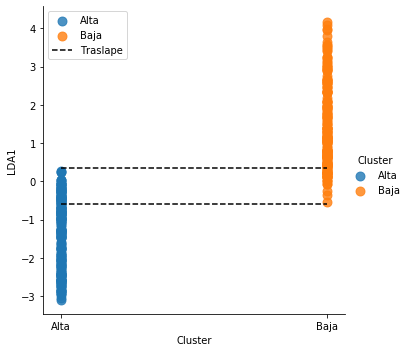

In [297]:
sns.lmplot(x="Cluster", y="LDA1",
  data=lda_df, 
  fit_reg=False, 
  hue='Cluster', # color por cluster de probabilidad
  legend=True,
  scatter_kws={"s": 80})
plt.hlines([-0.60,0.35], xmin=0, xmax=1, linestyles='--', label='Traslape')
plt.legend()
plt.show()

Eliminando las variables categoricas de Ranking y research, se logar una mejor segmentacion. Los resultados del LDA, permiten reducir la dimensionalidad de las categorías, de 2 (0 | 1) a una sola LDA1. El 97% de los datos se pueden clasificar, lo que quiere decir que existen variables explicativas para cada cluster. A continuación se descubrirán tales variables.

## Implementación PCA

In [298]:
from sklearn.decomposition import PCA

In [299]:
n_components=5

### PCA con estandarización en las variables explicativas

In [300]:
# Define number of principal components
#n_components=5
pca = PCA(n_components)

# Fit to features
pc = pca.fit_transform(df_features_std)

# Dataframe of principal components and wine labels
pc_df = pd.DataFrame(data = pc, columns = ["PC{}".format(str(i+1)) for i in range(n_components)])
pc_df['Cluster'] = df_labels
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,Cluster
0,-3.69,-0.60,-0.41,0.30,0.20,Alta
1,-1.41,0.76,-0.15,-0.32,0.26,Alta
2,0.82,0.25,-0.12,-0.35,0.19,Baja
3,-0.24,-1.07,0.42,0.35,-0.46,Alta
4,1.88,-0.56,-0.57,-0.40,0.19,Baja


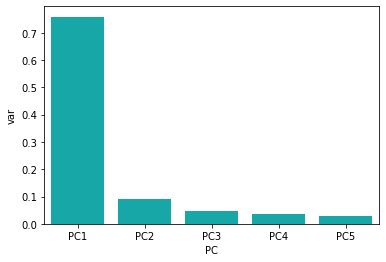

In [301]:
# Scree plot
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':["PC{}".format(str(i+1)) for i in range(n_components)]})
sns.barplot(x='PC',y="var", 
           data=pca_df, color="c")
plt.show()
# 1 componente principal explica el 70% de la varianza

La varianza entre cada PC es mayor, por lo que es más fácil diferenciar cada cluster. 

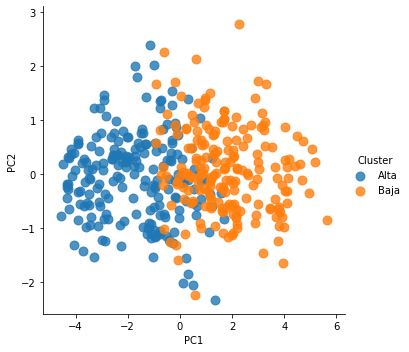

In [302]:
# Scatter plot primeros dos PCs categorizados por probabilidad alta o baja.
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size
plt.show()

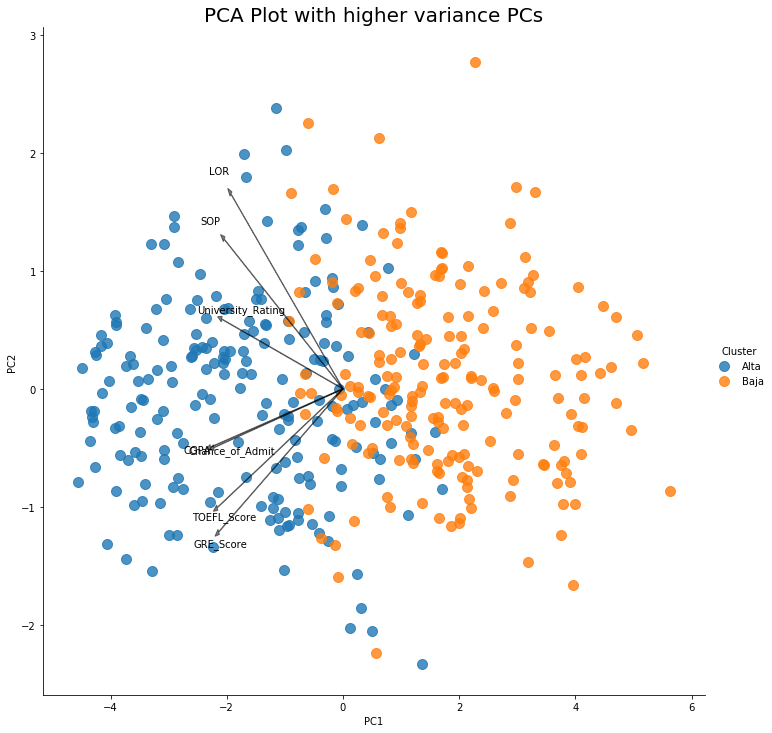

In [303]:
# PCA biplot

# Scatter plot based and assigned color based on 'label - y'
sns.lmplot('PC1', 'PC2', data=pc_df, fit_reg = False, height=10, hue = 'Cluster', scatter_kws={"s": 100})
 
xvector = pca.components_[0] # end point de cada vector dada la varianza de los PCs principales.
yvector = pca.components_[1]
 
# valores para los ejes del PC1 y PC2
xs = pca.transform(df_features_std)[:,0]
ys = pca.transform(df_features_std)[:,1]
 
## visualicion de las proyecciones
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys), color='k', width=0.005, head_width=0.05, alpha=0.5)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.1, list(df_features.columns.values)[i], color='k')

plt.title('PCA Plot with higher variance PCs',fontsize=20)
plt.show()

Resultados del PCA. Es posible observar que existe una alta correlación entre CGPA y la probabilidad de ser admitido. De la misma manera, la nota del TOEFL y del GRE están positivamente correlacionados entre sí, al igual que el LOR y el SOR están positivamente correlacionados; este par de pares correlacionados no presentan una correlación entre sí dado el ángulo de 90 grados entre tales vectores. Cada vector (feature) influencían en mayor proporción la varianza en el PC1; siendo el PC el componente que explica más del 70% de la varianza en los datos. 

# Proceso de regresión
Se tomarán en cuenta las primeras 3 variables con mayor influencia en tanto en el PC1 como en el PC2 para utilizarlas en cada modelo de regresión, con el fin de captar de mejor manera la varianza en la variable dependiente. Estas variables son:
* CGPA
* GRE_Score
* LOR

Se desarrollará la regresión lineal simple para cada una de éstas para determinar su costo, y posteriormente se realizará una regresión lineal múltiple en conjunto. Posteriormente se llevará a cabo el mismo análisis con una complejidad mayor

In [304]:
def h_teta(
        x: List[List[float]],
        coefs: List[List[float]]
    ) -> List[float]:
    """Calcula matricialmente las hipótesis para las tetas ingresadas.
    
    Retorna una lista con la hipótesis calculada para cada valor en x.
    """

    return (np.matmul(x, coefs)) # (174, 2) * (2, 1) = (174, 1)

def jota_teta(
        y: List[float],
        hipotesis: List[float],
        m: int,
        tetas: List[List[float]],
        _lambda: float,
    ) -> int:
    """Calcula el costo de error para la hipotesis respecto a los valores teóricos (y).
    
    m: cantidad de observaciones.

    Retorna un entero.
    """
    e = (y - hipotesis) # (n,1)
    e2 = np.matmul(e.T, e) # (1,1) suma de los errores cuadrados.
    #tts = np.matmul(tetas.T, tetas)
    
    #print('Errores ', 1/(2 * m) * e2)
    #print('Regularizacion ', (_lambda / (2 * m)) * tts)
    #res = 1/(2 * m) * (e2) + _lambda / (2 * m) * tts
    #print('Error ',e2)
    #print('RES ',e2)
    return (1/(2 * m) * (e2) + (_lambda / (2 * m)) * np.matmul(tetas.T, tetas)) # np.sum(np.power(tetas, 2))

def gradiente(
        x: List[List[float]],
        y: List[float],
        h: List[float],
        m: float,
        tetas: List[List[float]],
        _lambda: float,
    ) -> List[List[float]]:
    """Calcula el gradiente para el conjunto de valores X, Y, respecto a la hipotesis dada.
    
    Retorna una matriz (m,1) con los coeficientes.
    """
    
    return (((np.matmul((h - y).T, x).T) / float(m)) + ((_lambda / m) * np.sum(tetas))) # (1,100) * (100, 2) . T = (2, 1) //reshape(2,1)

def descenso_gradiente(
        x_set: List[List[float]],
        y_set: List[float],
        #tetas_iniciales: List[float],
        hipotesis: Callable[[Any], Any],#[[List[float], List[float]], List[float]], # Callable[[parametros], resultado]
        gradiente: Callable[[Any], Any],#[[List[float], List[float], List[float], float], List[float]], # Callable[[parametros], resultado]
        max_iters: int = 10000,
        alpha: float = 0.0001,
        _lambda: float = 0.0,
        grado: int = 1
    ) -> List[float]:
    
    """Esta función ejecuta el descenso en gradiente para encontrar las tetas que minimizan el costo."""
    
    X = transformar_arreglo(x_set, grado)
    
    m, n = X.shape
    #y_set = y_set.reshape(m,1) # convertir a vector columna.
    #print(y_set[-10:])
    tetas = np.random.rand(n,1)

    for i in range(max_iters):
        h = hipotesis(X, tetas) # vector solucion (100,1)
        #print((h - ys).shape) # (100,1) - (100,1)
        tetas -= alpha * gradiente(X, y_set, h, m, tetas, _lambda) 
    
    #costo = jota_teta(y_set, h, m)
    #y_pred = np.matmul(X,tetas)

    #return y_pred, tetas, costo.sum()
    return tetas#, X # retorno X, ya que incluye la col de uno's, la cual será útil en cross validation.

def cross_validate(x_train, y_train, x_test, y_test, tetas, _lambda = 0.0):
    """ Calculo la validación cruzada para los tetas resultantes del train set sobre el test set."""
    
    m = x_train.shape[0]
    h_train = h_teta(x_train, tetas)
    h_test = h_teta(x_test, tetas)
    costo_train = jota_teta(y_train, h_train, m, tetas, _lambda)
    costo_test = jota_teta(y_test, h_test, m, tetas, _lambda)
    
    return [(costo_train, costo_test), (h_train, h_test)]

def transformar_arreglo(x_set, grado):
    
    unos = np.ones(x_set.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.
    
    if grado == 1:
        X = np.vstack(
            (
            unos,
            x_set,
            #-x_set**2
            )
        ).T # Se transpuso la matriz para tener la columna de unos y asi calcular teta_0
    elif grado == 2:
        X = np.vstack(
            (
            unos,
            x_set,
            x_set**2
            )
        ).T
    elif grado == -2:
        X = np.vstack(
            (
            unos,
            x_set,
            -x_set**2
            )
        ).T
        
    return X

# Regresión lineal de grado 1
## Modelo 1 

In [679]:
vars_independientes = ['CGPA']
var_dependiente = ['Chance_of_Admit']

In [680]:
seed=161

df_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)

In [681]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [682]:
grado = 1
max_iters=50000
alpha=0.014
_lambda = 0.0

tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=max_iters, alpha=alpha, grado=grado)

X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)


costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas, _lambda=_lambda)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

# almacenando resultados para la seleccion del mejor modelo. 
pred_train_modelo1_CGPA = pred_train
pred_test_modelo1_CGPA = pred_test
costo_modelo1_CGPA = costo_test
tetas_modelo1 = tetas

In [683]:
costos

(array([[0.00233209]]), array([[0.00068121]]))

In [684]:
r2 = 1 - (np.matmul((y_test - pred_test).T, (y_test - pred_test)) /  np.matmul((y_test - np.mean(y_test)).T, (y_test - np.mean(y_test))))
r2_modelo1_CGPA = r2*100
r2*100

array([[70.08285111]])

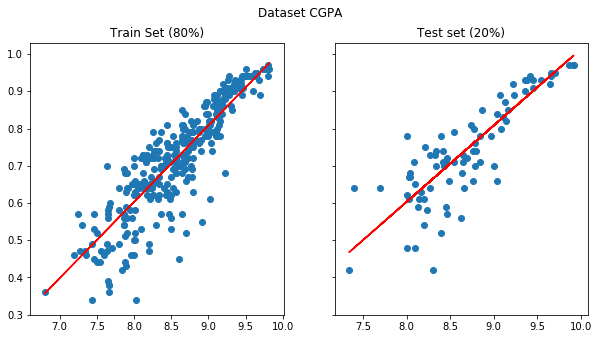

In [685]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset CGPA')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_train[vars_independientes], pred_train, color = 'r')
axs[0].scatter(df_train[vars_independientes], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_test[vars_independientes], pred_test, color = 'r')
axs[1].scatter(df_test[vars_independientes], df_test[var_dependiente])
plt.show()

In [ ]:
sns.lmplot('CGPA', 'Chance_of_Admit', data=df)

## Modelo 2
Regresion simple utilizando GRE_Score como variable independiente.

In [660]:
vars_independientes = ['GRE_Score']
#vars_independientes = ['TOEFL_Score']
vars_independientes

['GRE_Score']

In [661]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [662]:
grado = 1
max_iters = 8000
alpha=0.000001
_lambda = 1
tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=max_iters, alpha=alpha, _lambda=_lambda)

X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas, _lambda)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

In [663]:
costos

(array([[0.01288893]]), array([[0.00400088]]))

In [664]:
r2 = 1 - (np.matmul((y_test - pred_test).T, (y_test - pred_test)) /  np.matmul((y_test - np.mean(y_test)).T, (y_test - np.mean(y_test))))
r2*100

array([[-11.65513957]])

###  Observacion
A pesar de tener un costo relativo bajo, las tetas explican un porcentaje muy bajo de la variacion en la probabilidad de ser aceptado segun la variacion en la nota GRE. Esto se debe a que GRE tiene una escala muy alta; > 300, que debe explicar una variacion muy baja (de 0 a 1)

### Estrategia para arreglar la observacion anterior
Se realizara una estandarizacion de los features utilizando su promedio y varianza, para obtener unos coeficientes que describan de mejor manera la variacion en GRE Score que la escala inicial. Luego se retornara la teta correspondiente al feature escalado a su escala original despejando la ecuacion que corresponde a la estandarizacion de standard scaler.

In [665]:
sc = StandardScaler()
#sc = MinMaxScaler()
x_train = sc.fit_transform(df_train[vars_independientes]).T
x_test = sc.fit_transform(df_test[vars_independientes]).T

In [666]:
grado = 1
max_iters = 1000#20000
alpha=0.1
_lambda = 0.0

tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=max_iters, alpha=alpha, _lambda=_lambda)

X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas, _lambda)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

# almacenando resultados para la seleccion del mejor modelo. 
pred_train_modelo2_GRE = pred_train
pred_test_modelo2_GRE = pred_test
costo_modelo2_GRE = costo_test

In [667]:
costos # mejoro el costo con la re escala

(array([[0.00368032]]), array([[0.00086897]]))

In [668]:
r2 = 1 - (np.matmul((y_test - pred_test).T, (y_test - pred_test)) /  np.matmul((y_test - np.mean(y_test)).T, (y_test - np.mean(y_test))))
r2_modelo2_GRE = r2*100 # mejora el R2 con la re escala
r2_modelo2_GRE


array([[61.83704456]])

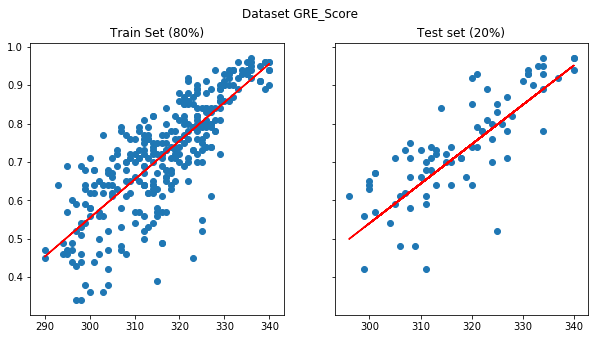

In [669]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset GRE_Score')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_train[vars_independientes], pred_train, color = 'r')
axs[0].scatter(df_train[vars_independientes], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_test[vars_independientes], pred_test, color = 'r')
axs[1].scatter(df_test[vars_independientes], df_test[var_dependiente])
plt.show()

Con este feature scaling, se mejoro el R2 del modelo, al igual que mejoro el costo respecto al modelo con el feature en escala original.

## Calculo de la tetas en escala original
Ya que actualmente las tetas corresponden a los valores re-escalados, hay que convertir la teta correspondiente al GRE de escala alterada, a su escala original, para encontrar ello se divide el coeficiente, respecto a su escala correspondiente; siendo el nuevo teta en escala original, y el intercepto se encuentra calculando la diferencia entre el coeficiente de intercepto escalado y los coeficientes en su escala original. A continuacion se lleva a cabo el proceso.  

In [670]:
tetas # tetas resultantes del Standard Scaler

array([[0.72075   ],
       [0.11566671]])

In [671]:
# Calculo de las tetas a su tamano original
intercepto = tetas[0] - np.dot(np.true_divide(tetas[1:], sc.scale_), sc.mean_)
intercepto, tetas[1:] / sc.scale_

(array([-2.54350878]), array([[0.01027911]]))

In [672]:
# unificacion a un vector con las tetas ya en su tamano original
coefficients = np.true_divide(tetas[1:],  sc.scale_)
intercept = tetas[0] - np.dot(coefficients, sc.mean_)
tetas_test = np.array([intercept, coefficients])
tetas_test # tetas a su escala original

array([[-2.543508781516576],
       [0.010279106574348594]], dtype=object)

In [673]:
# se vuelve a calcular x train y test sin el escalamiento para probarlo con las tetas originales resultantes del escalamiento.
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])

In [674]:
X_train = transformar_arreglo(x_train, grado=1)
X_test = transformar_arreglo(x_test, grado=1)

In [675]:
pred_train = np.matmul(X_train, tetas_test) 
pred_test = np.matmul(X_test, tetas_test)

In [676]:
# tetas con escalamiento
tetas

array([[0.72075   ],
       [0.11566671]])

In [677]:
#tetas a su tamano original
tetas_modelo2 = tetas_test
tetas_modelo2

array([[-2.543508781516576],
       [0.010279106574348594]], dtype=object)

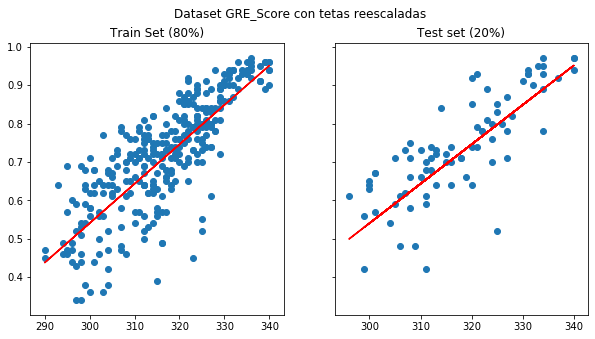

In [678]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset GRE_Score con tetas reescaladas')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_train[vars_independientes], pred_train, color = 'r')
axs[0].scatter(df_train[vars_independientes], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_test[vars_independientes], pred_test, color = 'r')
axs[1].scatter(df_test[vars_independientes], df_test[var_dependiente])
plt.show()

## Modelo 3
Este modelo, es una regresion simple con la variable explicativa LOR.

In [706]:
vars_independientes = ['LOR']
vars_independientes

['LOR']

In [707]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [708]:
tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=50000, alpha=0.014)

X_train = transformar_arreglo(x_train, 1)

X_test = transformar_arreglo(x_test, 1)


costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones
# almacenando resultados para la seleccion del mejor modelo. 
pred_train_modelo3_LOR = pred_train
pred_test_modelo3_LOR = pred_test
costo_modelo3_LOR = costo_test
tetas_modelo3 = tetas

In [709]:
costos

(array([[0.00572605]]), array([[0.00126544]]))

In [710]:
r2 = 1 - (np.matmul((y_test - pred_test).T, (y_test - pred_test)) /  np.matmul((y_test - np.mean(y_test)).T, (y_test - np.mean(y_test))))
r2_modelo3_LOR = r2*100
r2_modelo3_LOR

array([[44.42476596]])

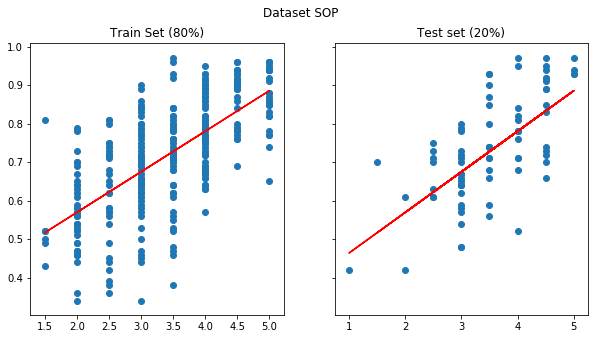

In [711]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset SOP')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_train[vars_independientes], pred_train, color = 'r')
axs[0].scatter(df_train[vars_independientes], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_test[vars_independientes], pred_test, color = 'r')
axs[1].scatter(df_test[vars_independientes], df_test[var_dependiente])
plt.show()

# Regresión Lineal Múltiple | Grado 1
## Modelo 4
A continuación se creará un modelo lineal utilizando las 3 variables explicativas utilizadas en los modelos anteriores.

In [714]:
vars_independientes = [
        'CGPA',
        'GRE_Score',
        'LOR',
        'University_Rating'
    ]
#vars_independientes = ['TOEFL_Score']
vars_independientes

['CGPA', 'GRE_Score', 'LOR', 'University_Rating']

In [715]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [716]:
sc = StandardScaler()
#sc = MinMaxScaler()
x_train = sc.fit_transform(df_train[vars_independientes]).T
x_test = sc.fit_transform(df_test[vars_independientes]).T

In [717]:
grado = 1

tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=50000, alpha=0.0000014, grado = grado)

X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

In [718]:
costos

(array([[0.53611044]]), array([[0.13039379]]))

### Observacion
El escalamiento en las variables explicativas no mejora el costo respecto a los modelos anteriores, ya que la unica variable que debe re escalarse, debido a su varianza, es GRE Score. A continuacion se re escala GRE Score calculando el cociente de su valor real y 100 para obtener la nueva escala.

### Cambiando la escala de GRE Score a una razon de 1/100

In [719]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [720]:
x_train[1][:10] # muestra de los valores de GRE Score

array([330., 312., 304., 319., 322., 317., 309., 326., 315., 299.])

In [721]:
idx = vars_independientes.index('GRE_Score')
x_train[idx] = x_train[idx]/100
x_test[idx] = x_test[idx]/100 # solo para el cross validation
x_train[idx][:10] 

array([3.3 , 3.12, 3.04, 3.19, 3.22, 3.17, 3.09, 3.26, 3.15, 2.99])

In [722]:
grado = 1
max_iters = 70000
lr = 0.015
_lambda = 0.0001
tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=max_iters, alpha=lr, grado=grado, _lambda=_lambda)

X_train = transformar_arreglo(x_train, grado=grado)

X_test = transformar_arreglo(x_test, grado=grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

In [723]:
costos

(array([[0.00232475]]), array([[0.00062707]]))

In [347]:
tetas # tetas con GRE Score escalado

array([[-0.58234365],
       [ 0.16540462],
       [-0.07589383],
       [ 0.02309963],
       [ 0.01507772]])

In [724]:
# re escalamiento de la teta correspondiente a GRE Score para mantener la misma influencia sobre Probabilidad de ser Aceptado
tetas[idx+1] = tetas[idx+1]/100
tetas

array([[-0.59847436],
       [ 0.164931  ],
       [-0.00069281],
       [ 0.02306878],
       [ 0.01486477]])

In [349]:
x_train[idx][:10]

array([3.3 , 3.12, 3.04, 3.19, 3.22, 3.17, 3.09, 3.26, 3.15, 2.99])

In [725]:
x_train[idx] = x_train[idx]*100 # regreso GRE Score a su escala normal para el cross validation.
x_test[idx] = x_test[idx]*100
x_train[idx][:10]

array([330., 312., 304., 319., 322., 317., 309., 326., 315., 299.])

In [726]:
X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

# almacenando resultados para la seleccion del mejor modelo. 
pred_train_modelo4 = pred_train
pred_test_modelo4 = pred_test
costo_modelo4 = costo_test
tetas_modelo4 = tetas

In [727]:
costos # se mantiene el mismo costo con el reescalamiento de la teta correspondiente a GRE Score.

(array([[0.00232475]]), array([[0.00062707]]))

In [728]:
r2 = 1 - (np.matmul((y_test - pred_test).T, (y_test - pred_test)) /  np.matmul((y_test - np.mean(y_test)).T, (y_test - np.mean(y_test))))
r2_modelo4 = r2*100
r2_modelo4

array([[72.46060447]])

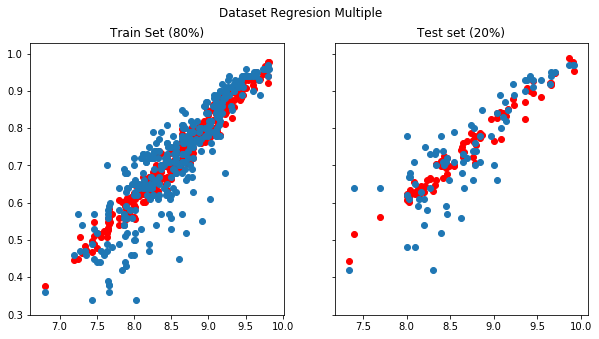

In [354]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset Regresion Multiple')

axs[0].set_title('Train Set (80%)')
axs[0].scatter(df_train[vars_independientes[0]], pred_train, color = 'r')
axs[0].scatter(df_train[vars_independientes[0]], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].scatter(df_test[vars_independientes[0]], pred_test, color = 'r')
axs[1].scatter(df_test[vars_independientes[0]], df_test[var_dependiente])
plt.show()

## Modelo 5
En este modelo se utilizarán las variables que afectan proporcionalmente más la varianza de PC1 según Análisis de Componentes Principales PCA llevado a cabo con anterioridad. Estas son:
* CGPA
* TOEFL_Score
* SOP

Se lleva a cabo el mismo proceso de re escalamiento que se realizo en los modelos anteriores.

In [731]:
vars_independientes = [
        'CGPA',
        'TOEFL_Score',
        'SOP',
        'University_Rating'
    ]
#vars_independientes = ['TOEFL_Score']
vars_independientes

['CGPA', 'TOEFL_Score', 'SOP', 'University_Rating']

In [732]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [733]:
x_train[1][:10] # muestra de los valores de GRE Score

array([113., 107., 105., 110., 115., 106., 106., 112., 105., 106.])

In [734]:
idx = vars_independientes.index('TOEFL_Score')
x_train[idx] = x_train[idx]/100
x_test[idx] = x_test[idx]/100 # solo para el cross validation
x_train[idx][:10] 

array([1.13, 1.07, 1.05, 1.1 , 1.15, 1.06, 1.06, 1.12, 1.05, 1.06])

In [735]:
grado = 1
max_iters = 70000
lr = 0.013
_lambda = 0.00001

tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=max_iters, alpha=lr, grado=grado, _lambda=_lambda)

X_train = transformar_arreglo(x_train, grado=grado)

X_test = transformar_arreglo(x_test, grado=grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

In [736]:
costos

(array([[0.00225128]]), array([[0.00056866]]))

In [737]:
tetas # tetas utilizando TOEFL Score en la escala 1/100

array([[-0.90916236],
       [ 0.16214377],
       [ 0.16349408],
       [ 0.00688681],
       [ 0.01343229]])

In [738]:
# re escalo la teta correspondiente a TOEFl Score para mantener su influencia con valores originales.
tetas[idx+1] = tetas[idx+1]/100 # idx + 1 debido a la columna de unos que se le agrego anteriormente
tetas

array([[-0.90916236],
       [ 0.16214377],
       [ 0.00163494],
       [ 0.00688681],
       [ 0.01343229]])

In [739]:
x_train[idx][:10]

array([1.13, 1.07, 1.05, 1.1 , 1.15, 1.06, 1.06, 1.12, 1.05, 1.06])

In [740]:
x_train[idx] = x_train[idx]*100 # lo regreso a su escala normal para el cross validation.
x_test[idx] = x_test[idx]*100
x_train[idx][:10]

array([113., 107., 105., 110., 115., 106., 106., 112., 105., 106.])

In [741]:
X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones
# almacenando resultados para la seleccion del mejor modelo. 
pred_train_modelo5 = pred_train
pred_test_modelo5 = pred_test
costo_modelo5 = costo_test
tetas_modelo5 = tetas

In [742]:
costos # se mantuvo el mismo costo, lo que quiere decir que la reescala se llevo a cabo perfectamente.

(array([[0.00225128]]), array([[0.00056866]]))

In [744]:
r2 = 1 - (np.matmul((y_test - pred_test).T, (y_test - pred_test)) /  np.matmul((y_test - np.mean(y_test)).T, (y_test - np.mean(y_test))))
r2_modelo5 = r2*100
r2_modelo5

array([[75.02596474]])

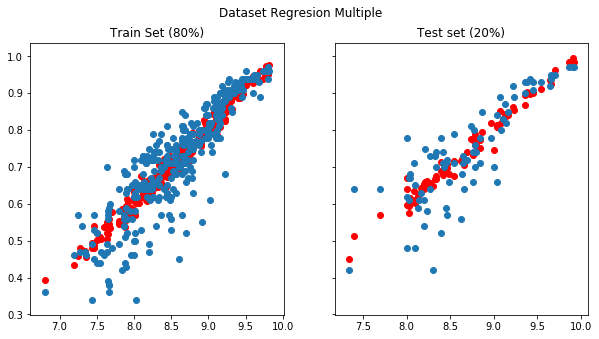

In [368]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset Regresion Multiple')

axs[0].set_title('Train Set (80%)')
axs[0].scatter(df_train[vars_independientes[0]], pred_train, color = 'r')
axs[0].scatter(df_train[vars_independientes[0]], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].scatter(df_test[vars_independientes[0]], pred_test, color = 'r')
axs[1].scatter(df_test[vars_independientes[0]], df_test[var_dependiente])
plt.show()

# Modelos de grado 2
## Modelo 6

In [746]:
vars_independientes = [
        'CGPA',
        'TOEFL_Score',
        'SOP',
        #'University_Rating'
    ]
#vars_independientes = ['TOEFL_Score']
vars_independientes

['CGPA', 'TOEFL_Score', 'SOP']

In [747]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [748]:
idx = vars_independientes.index('TOEFL_Score')
x_train[idx] = x_train[idx]/100
x_test[idx] = x_test[idx]/100 # solo para el cross validation
x_train[idx][:10] 

array([1.13, 1.07, 1.05, 1.1 , 1.15, 1.06, 1.06, 1.12, 1.05, 1.06])

In [749]:
grado = 2
max_iters = 90000
lr = 0.0001
_lambda = 0.0015#30000

tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=max_iters, alpha=lr, grado=grado, _lambda=_lambda)

X_train = transformar_arreglo(x_train, grado=grado)

X_test = transformar_arreglo(x_test, grado=grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

In [750]:
costos

(array([[0.00426344]]), array([[0.00081926]]))

In [751]:
r2 = 1 - (np.matmul((y_test - pred_test).T, (y_test - pred_test)) /  np.matmul((y_test - np.mean(y_test)).T, (y_test - np.mean(y_test))))
r2*100

array([[64.02002399]])

In [752]:
tetas

array([[ 0.84574868],
       [-0.38149561],
       [ 0.42187284],
       [ 0.30148284],
       [ 0.02444702],
       [ 0.33037294],
       [-0.04099201]])

In [753]:
# reescalo las tetas debido a el reescalamiento de las varibales independientes correspondientes.
tetas[idx+1] = tetas[idx+1]/100
tetas[2*(idx+1)+1] = tetas[2*(idx+1)+1]/(100**2)
tetas

array([[ 8.45748676e-01],
       [-3.81495610e-01],
       [ 4.21872841e-03],
       [ 3.01482838e-01],
       [ 2.44470158e-02],
       [ 3.30372943e-05],
       [-4.09920067e-02]])

In [754]:
x_train[idx] = x_train[idx]*100 # lo regreso a su escala normal para el cross validation y testear con tetas reescaladas.
x_test[idx] = x_test[idx]*100
x_train[idx][:10]

array([113., 107., 105., 110., 115., 106., 106., 112., 105., 106.])

In [755]:
X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

pred_train_modelo6 = pred_train
pred_test_modelo6 = pred_test
costo_modelo6 = costo_test
tetas_modelo6 = tetas

In [756]:
costos

(array([[0.00426344]]), array([[0.00081926]]))

In [757]:
r2 = 1 - (np.matmul((y_test - pred_test).T, (y_test - pred_test)) /  np.matmul((y_test - np.mean(y_test)).T, (y_test - np.mean(y_test))))
r2_modelo6 = r2*100
r2_modelo6

array([[64.02002399]])

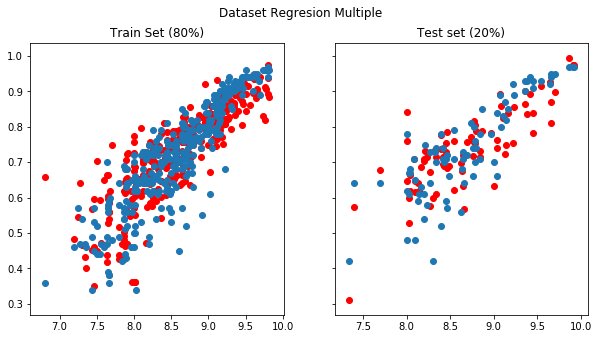

In [758]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset Regresion Multiple')

axs[0].set_title('Train Set (80%)')
axs[0].scatter(df_train[vars_independientes[0]], pred_train, color = 'r')
axs[0].scatter(df_train[vars_independientes[0]], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].scatter(df_test[vars_independientes[0]], pred_test, color = 'r')
axs[1].scatter(df_test[vars_independientes[0]], df_test[var_dependiente])
plt.show()

In [140]:
[0.00068057], [0.00059614] # Modelo lineal 1 y Modelo de regresion Multiple

([0.00068057], [0.00059614])

In [142]:
0.00068057 - 0.00059614 # diferencia entre ambos modelos

8.443000000000003e-05

## Modelo regresión lineal múltiple grado 1
A continuación se desarrollará una regresión lineal múltiple con todas las variables explicativas a excepcion de las dos categoricas Research y University Rating.

## Modelo 7

In [760]:
vars_independientes = [
        'CGPA',
        'TOEFL_Score',
        'GRE_Score',
        'LOR',
        'SOP',
        'University_Rating'
    ]
#vars_independientes = ['TOEFL_Score']
vars_independientes

['CGPA', 'TOEFL_Score', 'GRE_Score', 'LOR', 'SOP', 'University_Rating']

In [761]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [762]:
idx = vars_independientes.index('TOEFL_Score')
x_train[idx] = x_train[idx]/100
x_test[idx] = x_test[idx]/100 # solo para el cross validation
x_train[idx][:10] 

array([1.13, 1.07, 1.05, 1.1 , 1.15, 1.06, 1.06, 1.12, 1.05, 1.06])

In [763]:
idx2 = vars_independientes.index('GRE_Score')
x_train[idx2] = x_train[idx2]/100
x_test[idx2] = x_test[idx2]/100 # solo para el cross validation
x_train[idx2][:10] 

array([3.3 , 3.12, 3.04, 3.19, 3.22, 3.17, 3.09, 3.26, 3.15, 2.99])

In [764]:
grado = 1
max_iters = 90000
lr = 0.00001
_lambda = 600000#0.00011

tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=max_iters, alpha=lr, grado=grado, _lambda=_lambda)

X_train = transformar_arreglo(x_train, grado=grado)

X_test = transformar_arreglo(x_test, grado=grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones


In [765]:
costos

(array([[0.01015946]]), array([[0.00285049]]))

In [766]:
# re escalo la teta correspondiente a TOEFl Score para mantener su influencia con valores originales.
tetas[idx+1] = tetas[idx+1]/100 # idx + 1 debido a la columna de unos que se le agrego anteriormente
tetas[idx2+1] = tetas[idx2+1]/100 # idx + 1 debido a la columna de unos que se le agrego anteriormente
tetas


array([[-0.12246454],
       [ 0.11624388],
       [ 0.00086032],
       [-0.00106018],
       [ 0.17267052],
       [-0.17063628],
       [ 0.02417935]])

In [767]:
x_train[idx] = x_train[idx]*100 # lo regreso a su escala normal para el cross validation y testear con tetas reescaladas.
x_train[idx2] = x_train[idx2]*100

x_test[idx] = x_test[idx]*100
x_test[idx2] = x_test[idx2]*100

x_train[idx][:10]

array([113., 107., 105., 110., 115., 106., 106., 112., 105., 106.])

In [768]:
X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)

costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

pred_train_modelo7 = pred_train
pred_test_modelo7 = pred_test
costo_modelo7 = costo_test
tetas_modelo7 = tetas

In [622]:
costos

(array([[0.01244757]]), array([[0.00263224]]))

In [769]:
r2 = 1 - (np.matmul((y_test - pred_test).T, (y_test - pred_test)) /  np.matmul((y_test - np.mean(y_test)).T, (y_test - np.mean(y_test))))
r2_modelo7 = r2*100
r2_modelo7

array([[-25.18656524]])

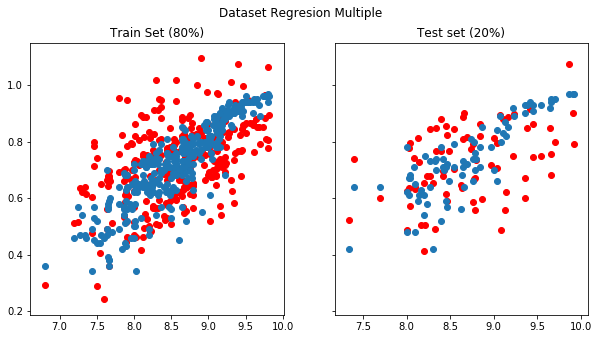

In [770]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset Regresion Multiple')

axs[0].set_title('Train Set (80%)')
axs[0].scatter(df_train[vars_independientes[0]], pred_train, color = 'r')
axs[0].scatter(df_train[vars_independientes[0]], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].scatter(df_test[vars_independientes[0]], pred_test, color = 'r')
axs[1].scatter(df_test[vars_independientes[0]], df_test[var_dependiente])
plt.show()

# Resultados para el mejor modelo
Para determinar el mejor modelo se tomó en cuenta las siguientes estadísticas de rendimiento y precisión:
* Función de Costo resultante del Cross Validation
* R2
* Capacidad de generalización.
* Cantidad de variables explicativas.

El resultado de estas métricas para cada modelo se presentan a continuación.

## Modelo 1

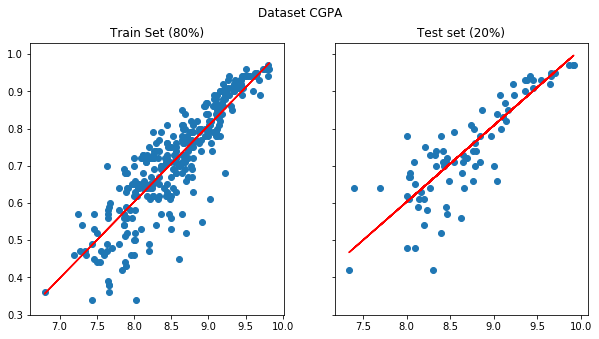

In [658]:
vars_independientes = [
    'CGPA'
]

fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset CGPA')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_train[vars_independientes], pred_train_modelo1_CGPA, color = 'r')
axs[0].scatter(df_train[vars_independientes], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_test[vars_independientes], pred_test_modelo1_CGPA, color = 'r')
axs[1].scatter(df_test[vars_independientes], df_test[var_dependiente])
plt.show()

In [659]:
# almacenando resultados para la seleccion del mejor modelo. 
pred_train_modelo1_CGPA
pred_test_modelo1_CGPA
costo_modelo1_CGPA
tetas_modelo1

array([[0.00068133]])

## Modelo 2

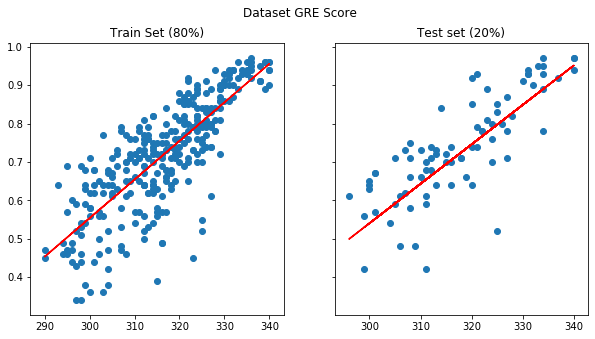

In [686]:
vars_independientes = [
    'GRE_Score'
]

fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset GRE Score')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_train[vars_independientes], pred_train_modelo2_GRE, color = 'r')
axs[0].scatter(df_train[vars_independientes], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_test[vars_independientes], pred_test_modelo2_GRE, color = 'r')
axs[1].scatter(df_test[vars_independientes], df_test[var_dependiente])
plt.show()

In [ ]:
# almacenando resultados para la seleccion del mejor modelo. 
pred_train_modelo2_GRE
pred_test_modelo2_GRE
costo_modelo2_GRE
r2_modelo2_GRE
tetas_modelo2

## Modelo 3

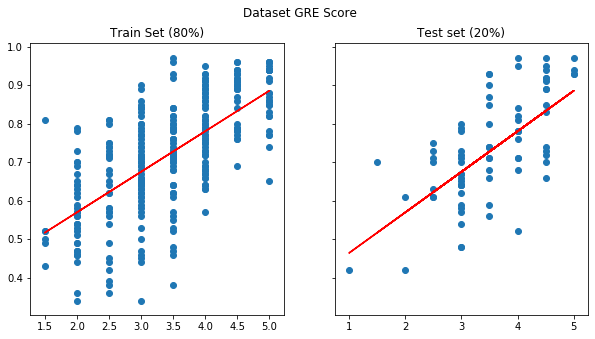

In [713]:
vars_independientes = [
    'LOR'
]

fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset GRE Score')

axs[0].set_title('Train Set (80%)')
axs[0].plot(df_train[vars_independientes], pred_train_modelo3_LOR, color = 'r')
axs[0].scatter(df_train[vars_independientes], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].plot(df_test[vars_independientes], pred_test_modelo3_LOR, color = 'r')
axs[1].scatter(df_test[vars_independientes], df_test[var_dependiente])
plt.show()

In [ ]:
pred_train_modelo3_LOR
pred_test_modelo3_LOR
costo_modelo3_LOR
tetas_modelo3

## Modelo 4

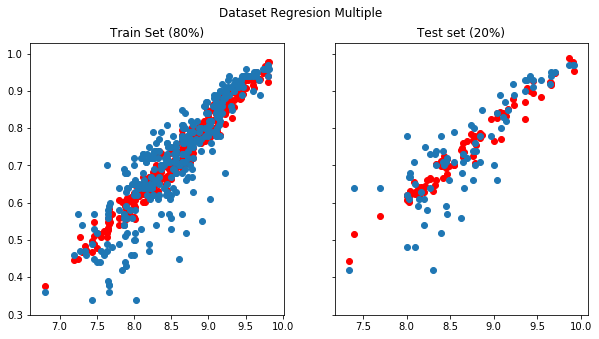

In [730]:
vars_independientes = [
        'CGPA',
        'GRE_Score',
        'LOR',
        'University_Rating'
    ]
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset Regresion Multiple')

axs[0].set_title('Train Set (80%)')
axs[0].scatter(df_train[vars_independientes[0]], pred_train_modelo4, color = 'r')
axs[0].scatter(df_train[vars_independientes[0]], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].scatter(df_test[vars_independientes[0]], pred_test_modelo4, color = 'r')
axs[1].scatter(df_test[vars_independientes[0]], df_test[var_dependiente])
plt.show()

In [ ]:
pred_train_modelo4
pred_test_modelo4
costo_modelo4
tetas_modelo4
r2_modelo4

## Modelo 5

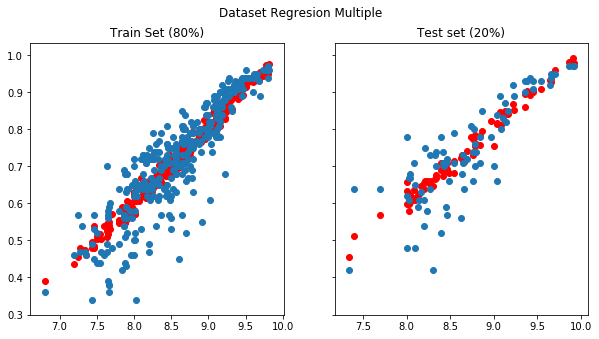

In [745]:
vars_independientes = [
        'CGPA',
        'TOEFL_Score',
        'SOP',
        'University_Rating'
    ]

fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset Regresion Multiple')

axs[0].set_title('Train Set (80%)')
axs[0].scatter(df_train[vars_independientes[0]], pred_train_modelo5, color = 'r')
axs[0].scatter(df_train[vars_independientes[0]], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].scatter(df_test[vars_independientes[0]], pred_test_modelo5, color = 'r')
axs[1].scatter(df_test[vars_independientes[0]], df_test[var_dependiente])
plt.show()


In [ ]:
pred_train_modelo5
pred_test_modelo5
costo_modelo5
tetas_modelo5
r2_modelo5

## Modelo 6

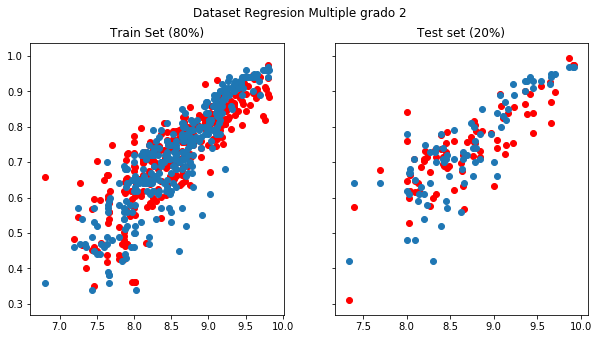

In [759]:
vars_independientes = [
        'CGPA',
        'TOEFL_Score',
        'SOP',
        #'University_Rating'
    ]
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset Regresion Multiple grado 2')

axs[0].set_title('Train Set (80%)')
axs[0].scatter(df_train[vars_independientes[0]], pred_train_modelo6, color = 'r')
axs[0].scatter(df_train[vars_independientes[0]], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].scatter(df_test[vars_independientes[0]], pred_test_modelo6, color = 'r')
axs[1].scatter(df_test[vars_independientes[0]], df_test[var_dependiente])
plt.show()


In [ ]:
pred_train_modelo6
pred_test_modelo6
costo_modelo6
tetas_modelo6
r2_modelo6

## Modelo 7

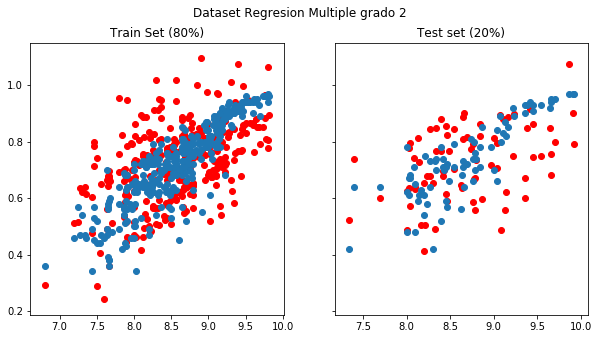

In [771]:
vars_independientes = [
        'CGPA',
        'TOEFL_Score',
        'GRE_Score',
        'LOR',
        'SOP',
        'University_Rating'
    ]

fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)
fig.suptitle('Dataset Regresion Multiple grado 2')

axs[0].set_title('Train Set (80%)')
axs[0].scatter(df_train[vars_independientes[0]], pred_train_modelo7, color = 'r')
axs[0].scatter(df_train[vars_independientes[0]], df_train[var_dependiente])

axs[1].set_title('Test set (20%)')
axs[1].scatter(df_test[vars_independientes[0]], pred_test_modelo7, color = 'r')
axs[1].scatter(df_test[vars_independientes[0]], df_test[var_dependiente])
plt.show()

In [ ]:
pred_train_modelo7
pred_test_modelo7
costo_modelo7
tetas_modelo7
r2_modelo7

# Costos para cada modelo

In [782]:
costos = (costo_modelo1_CGPA, costo_modelo2_GRE, costo_modelo3_LOR, costo_modelo4, costo_modelo5, costo_modelo6, costo_modelo7)
x_label = ['Modelo {}'.format(i+1) for i in range(len(costos))]
#x_label = [(i+1) for i in range(len(costos))]
x_label

[1, 2, 3, 4, 5, 6, 7]

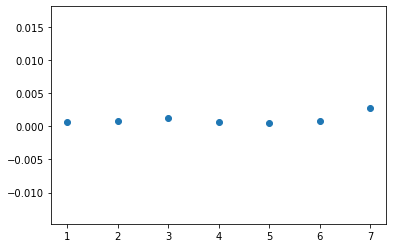

In [795]:
plt.scatter(x=x_label, y=costos)
plt.show()

In [796]:
print("El modelo que presentó un menor costo y mayor R2 es el modelo {}".format((costos.index(min(costos))+1)))

El modelo que presentó un menor costo y mayor R2 es el modelo 5


# Mejor modelo
El mejor modelo es el modelo 5, ya que logra explicar de mejor manera la variación en la porbabilidad de ser aceptado según la variación de sus variables independientes, así como también presenta el menor costo respecto a los otros modelos. 